In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB                      
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.ensemble import RandomForestClassifier             
from sklearn.svm import SVC                                     
import joblib

In [2]:
df = pd.read_csv('census.csv')
df = pd.DataFrame(data = df)

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [9]:
#checking for outliers
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# EDA

In [11]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [12]:
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [13]:
cont_cols.remove('Education_num')

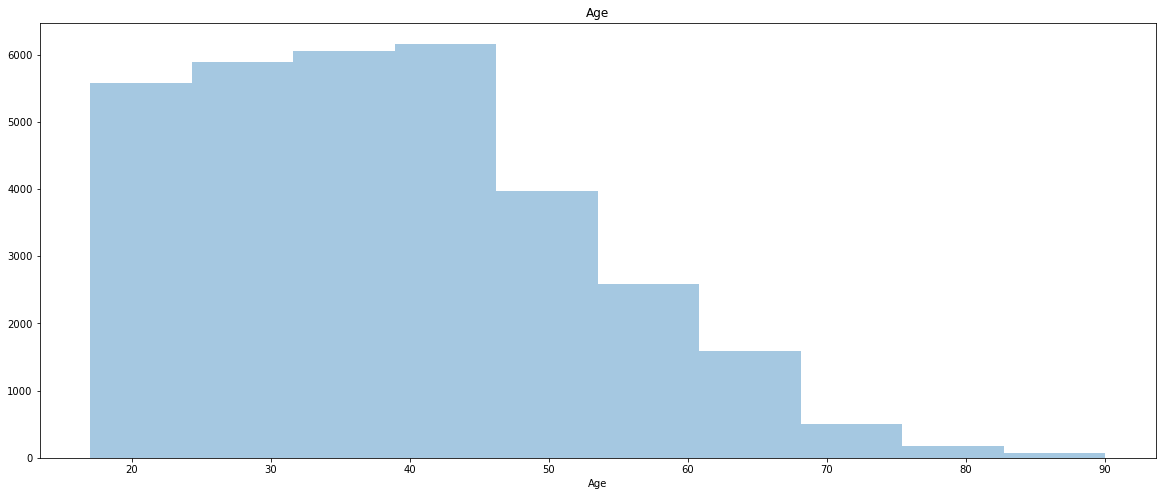

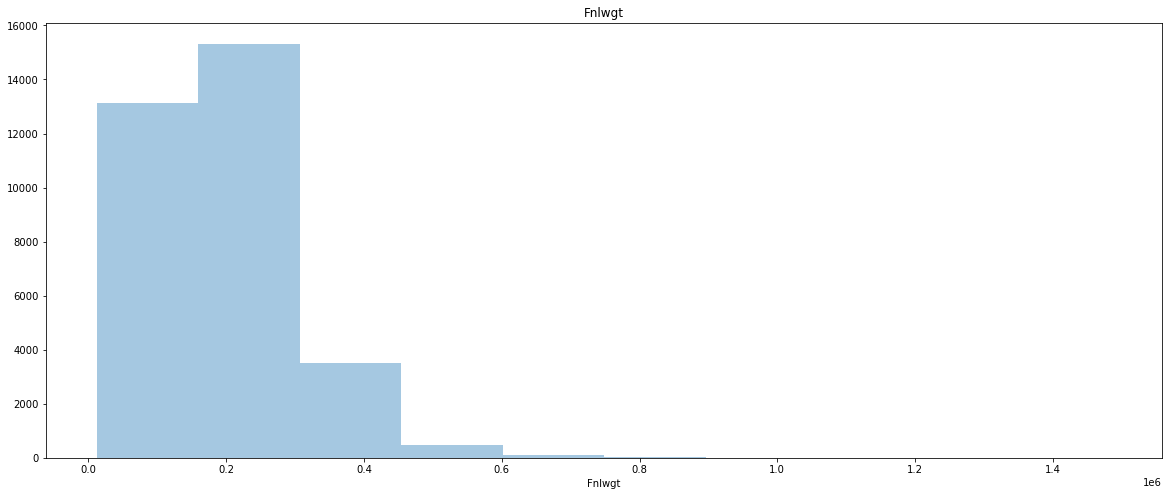

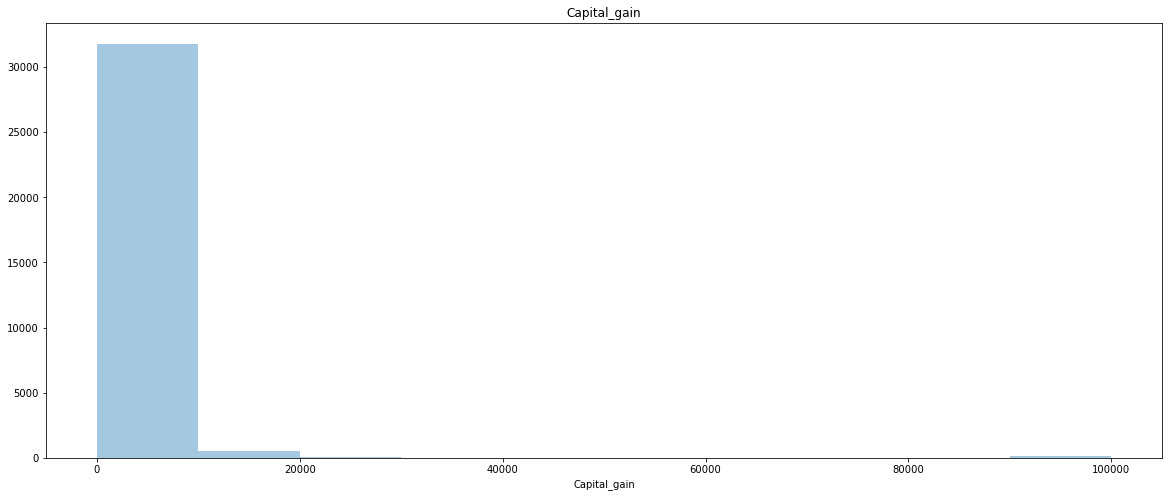

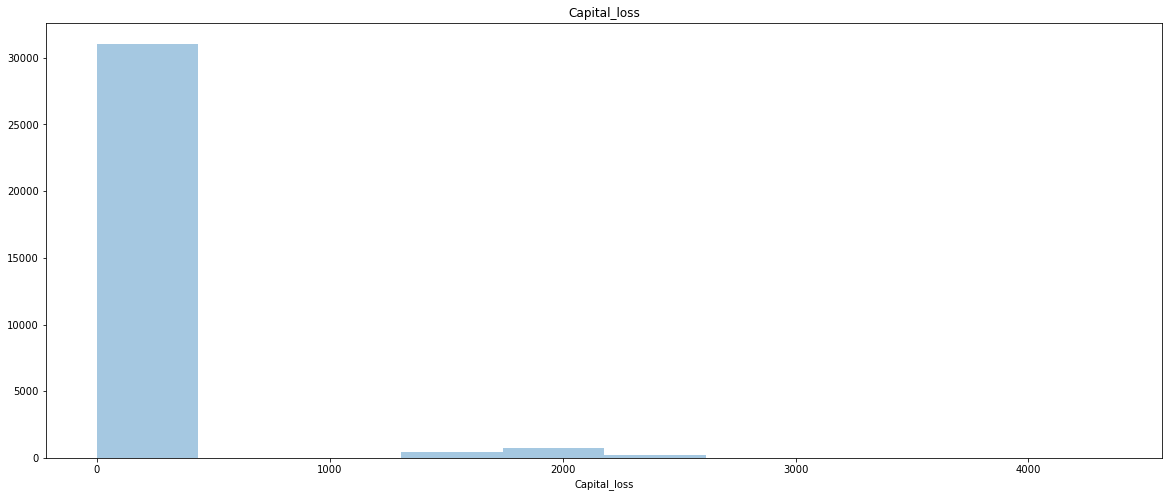

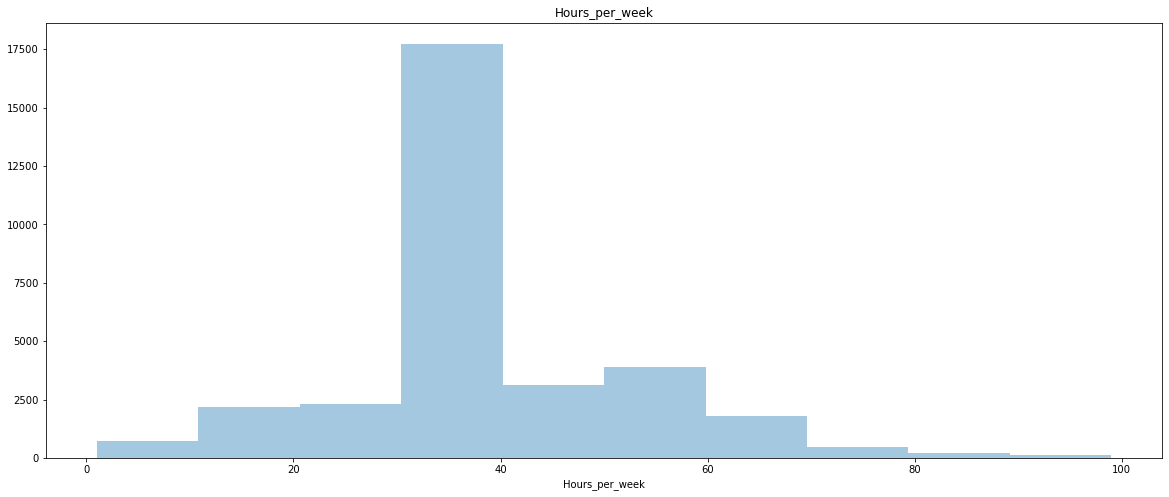

In [14]:
#Univariate analysis
for i in cont_cols:                                 
    plt.figure(figsize = (20, 8))
    sns.distplot(a= df[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

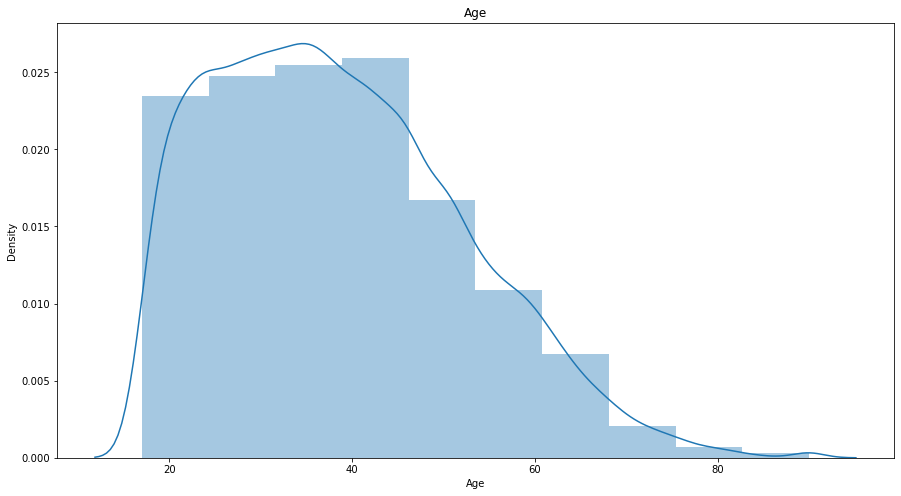

In [15]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Age'], bins = 10)
plt.title('Age')
plt.show()

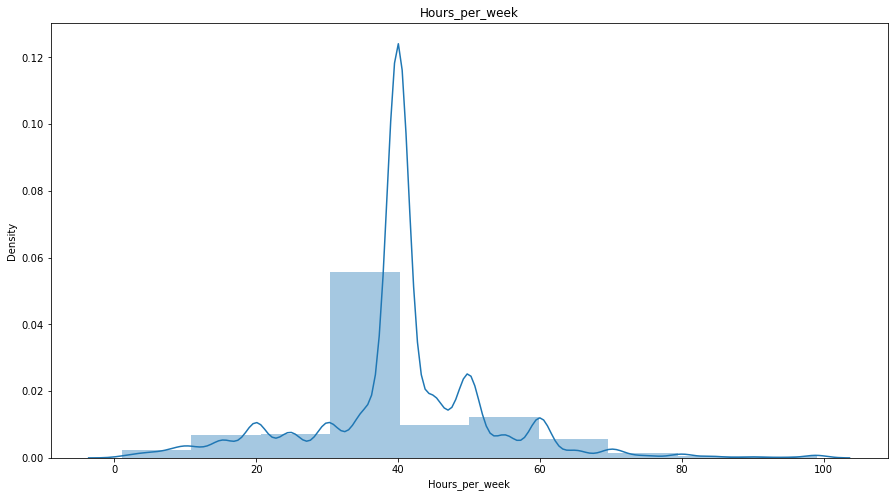

In [16]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Hours_per_week'], bins = 10)
plt.title('Hours_per_week')
plt.show()

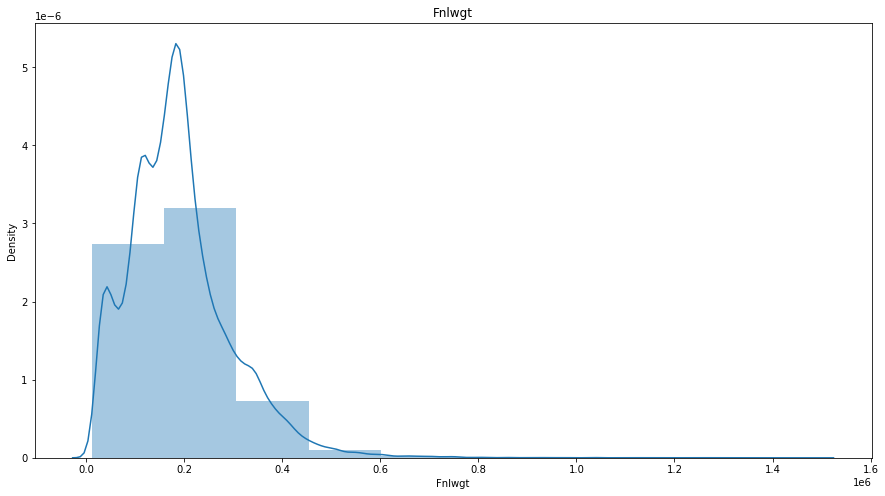

In [17]:
plt.figure(figsize = (15, 8))
sns.distplot(df['Fnlwgt'], bins = 10)
plt.title('Fnlwgt')
plt.show()

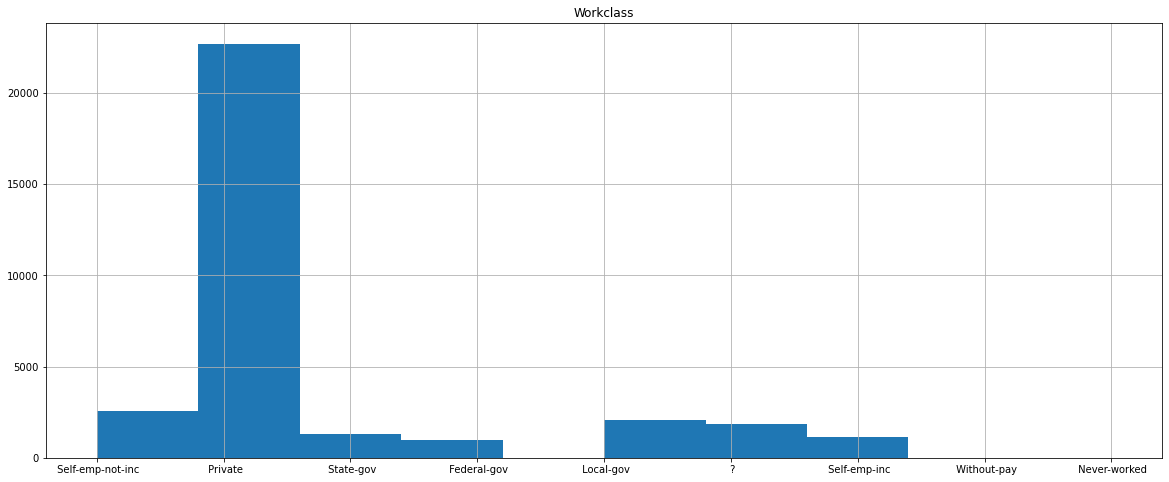

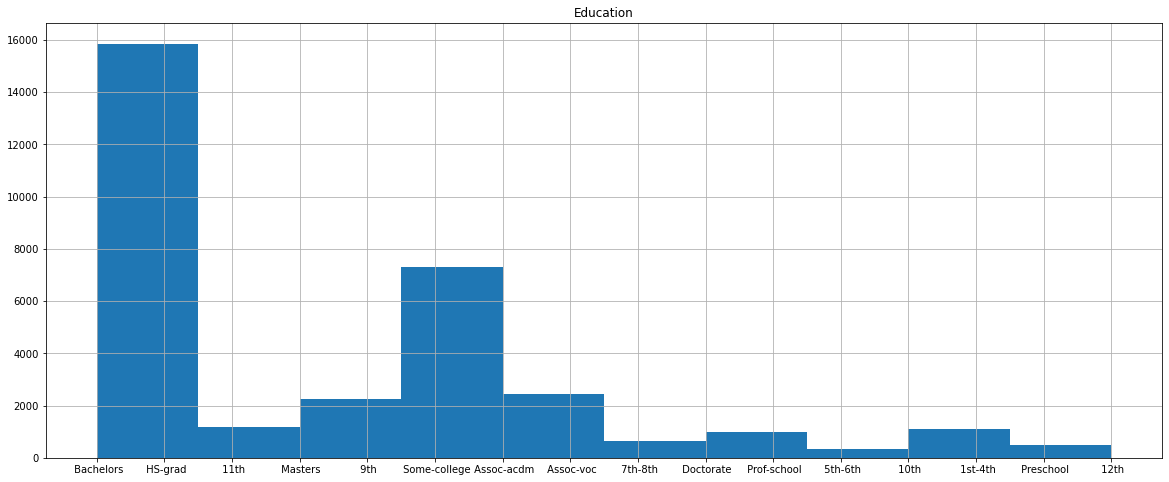

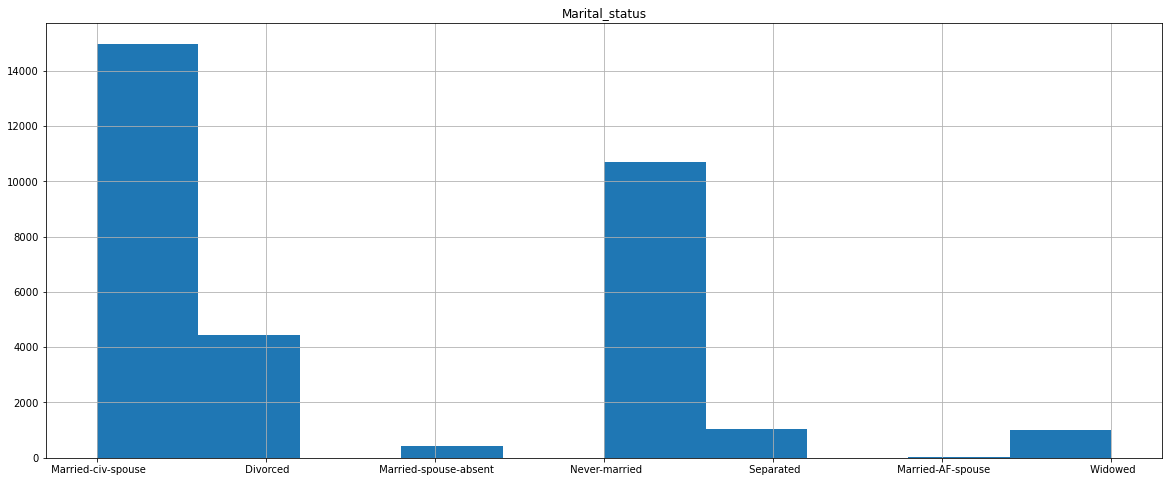

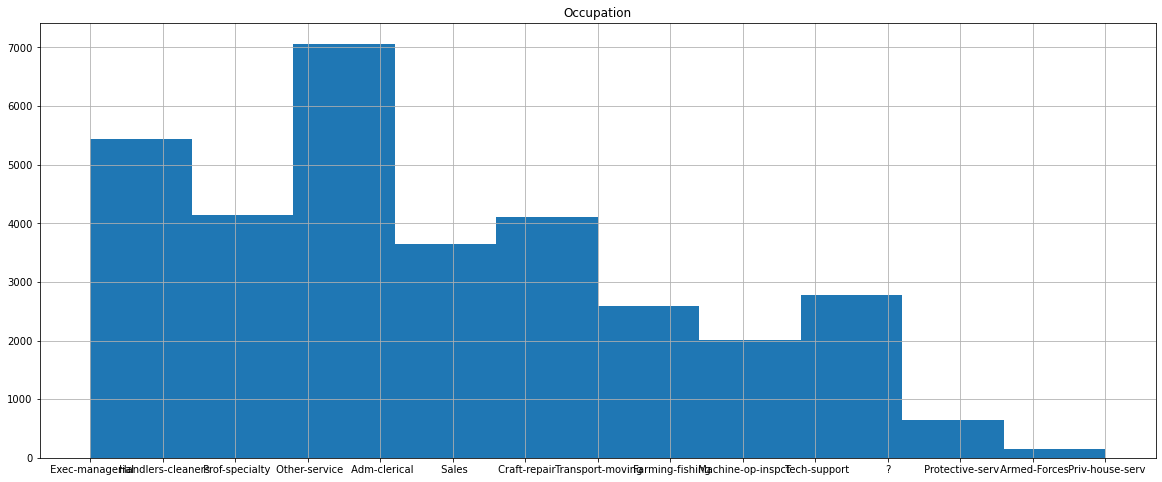

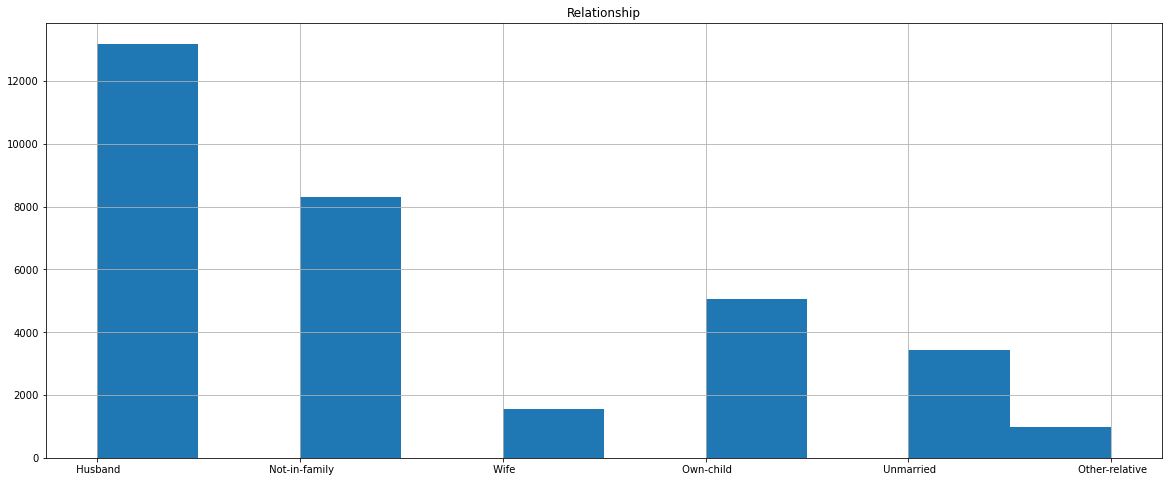

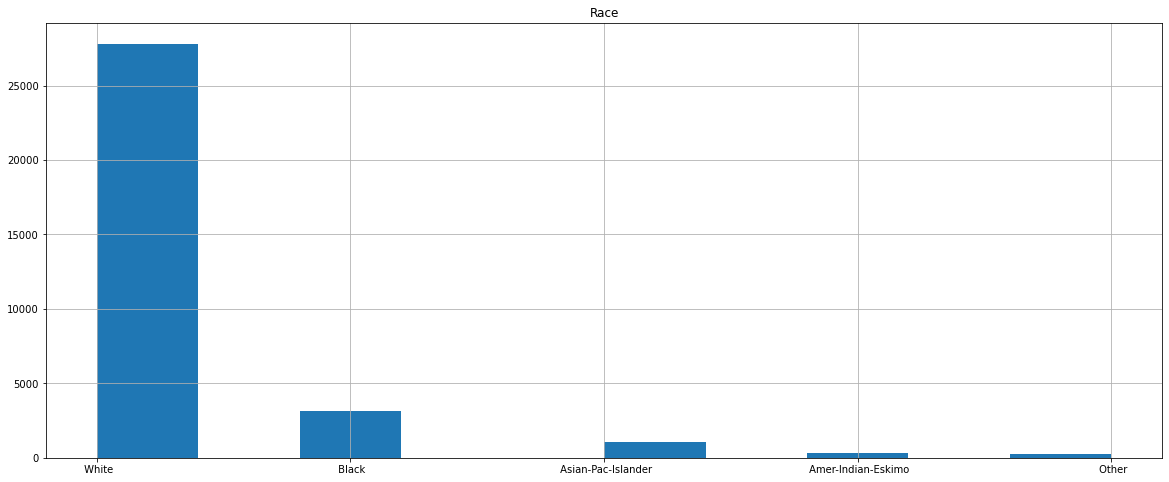

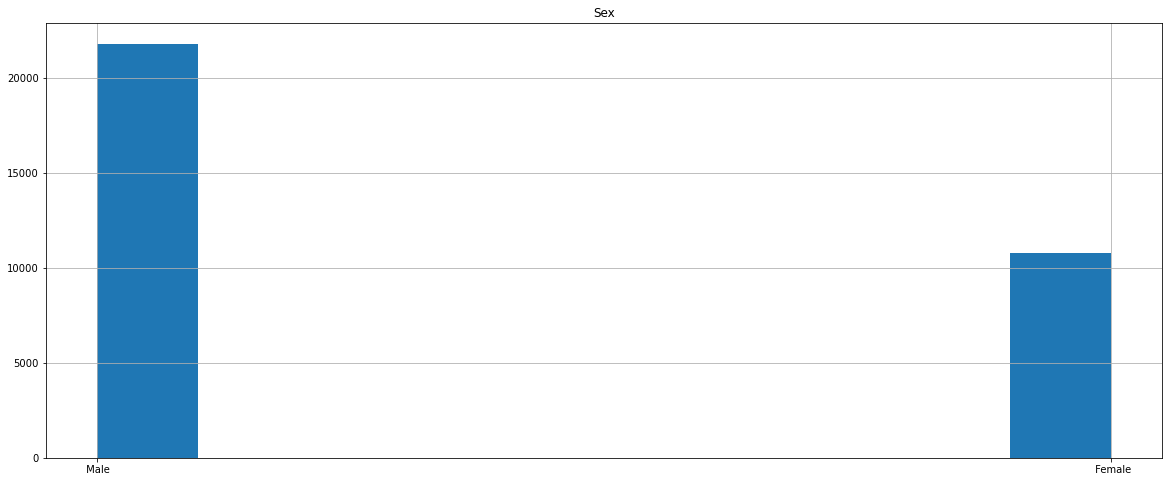

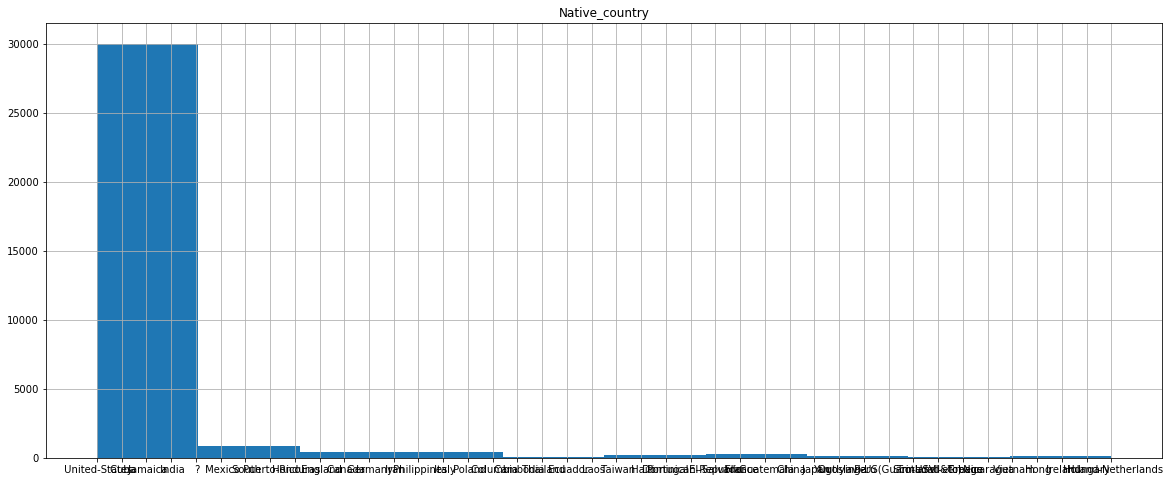

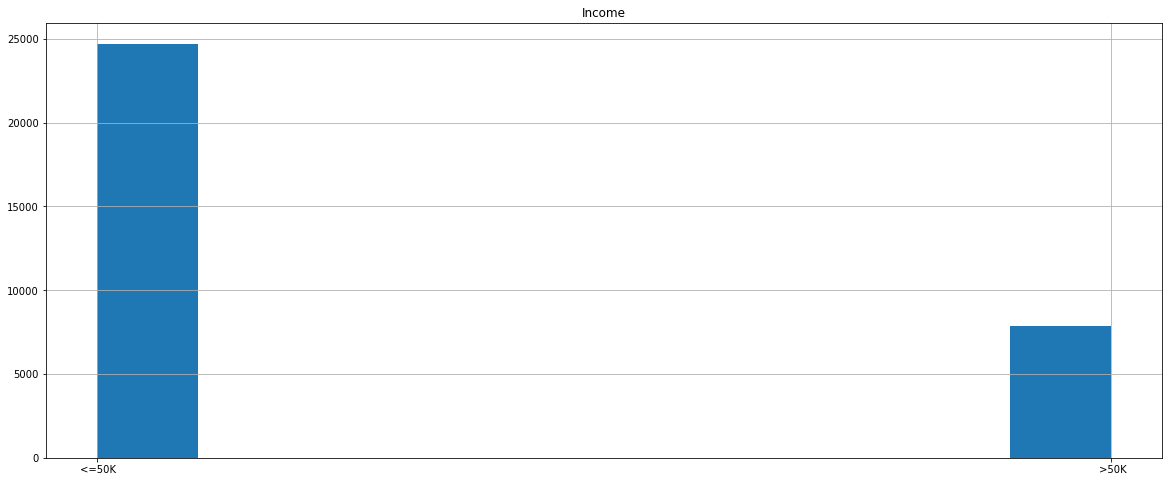

In [18]:
#univariate analysis
for i in cate_cols:                                 
    plt.figure(figsize = (20, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [19]:
df.loc[df['Occupation'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [20]:
df.loc[df['Workclass'] == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [21]:
df.loc[(df['Workclass'] == ' ?') & (df['Occupation'] != ' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [22]:
df.loc[(df['Workclass'] != ' ?') & (df['Occupation'] == ' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
5360,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10844,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14771,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20336,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23231,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32303,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32313,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [23]:
df.loc[(df['Workclass'] == ' ?') & (df['Occupation'] == ' ?')]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Text(0.5, 1.0, 'Income Pie Chart')

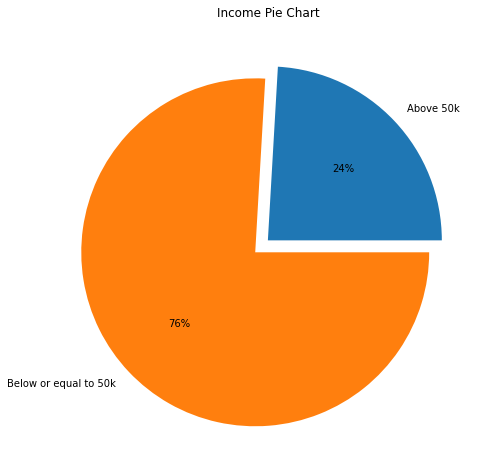

In [24]:
vals = [df['Income'][df['Income'] == ' >50K'].count() , df['Income'][df['Income'] == ' <=50K'].count()]
plt.figure(figsize = (15, 8))
label = ["Above 50k" , "Below or equal to 50k"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1))
plt.title("Income Pie Chart")

76% of people in the given data set has income below or equal to 50k, while only 24% are earning above 50k.

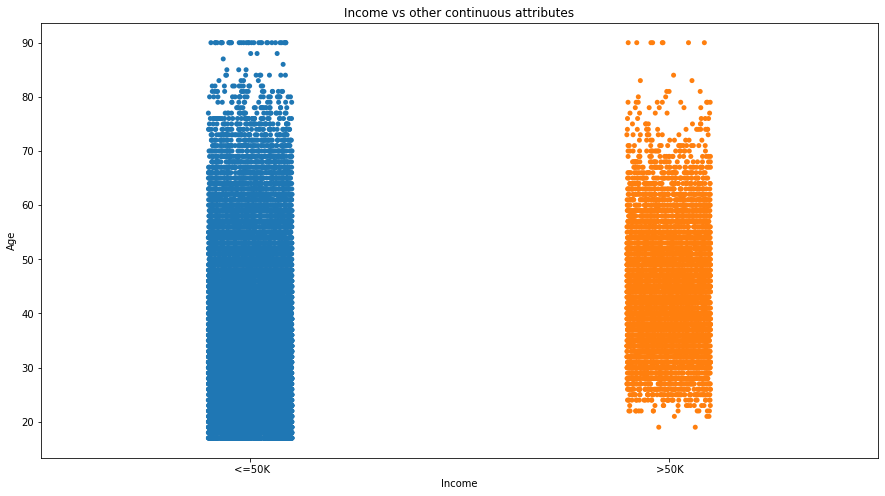

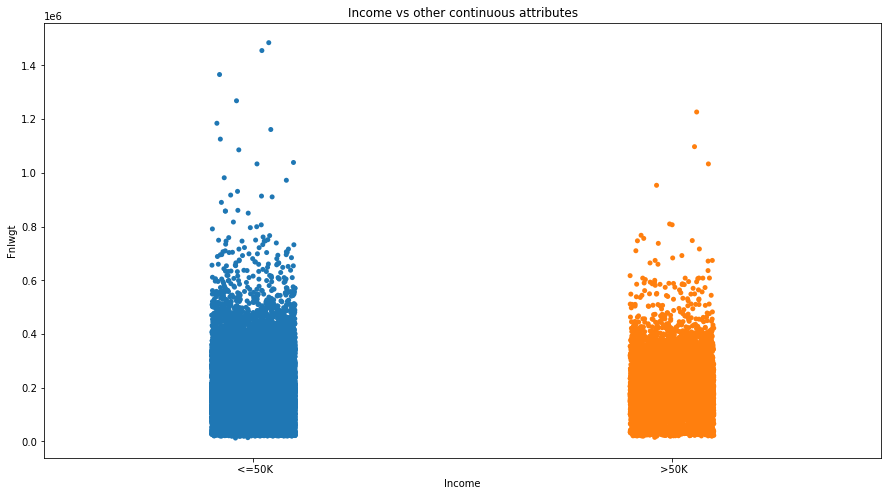

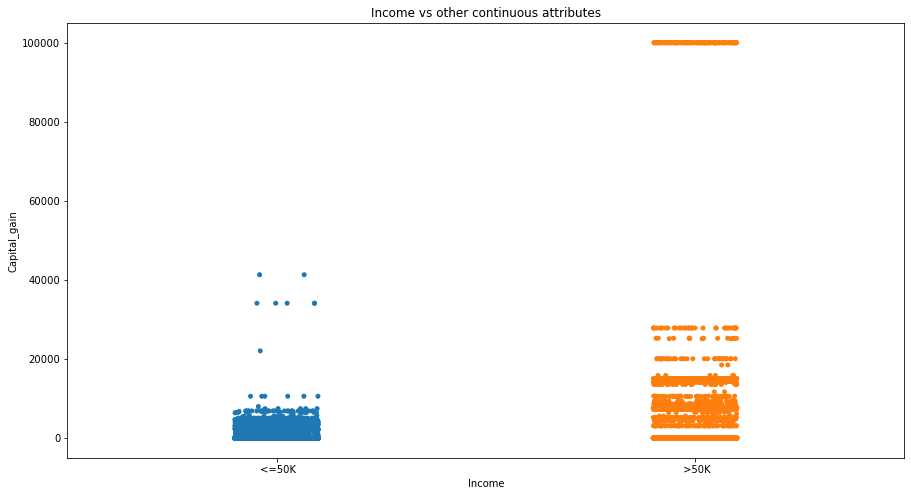

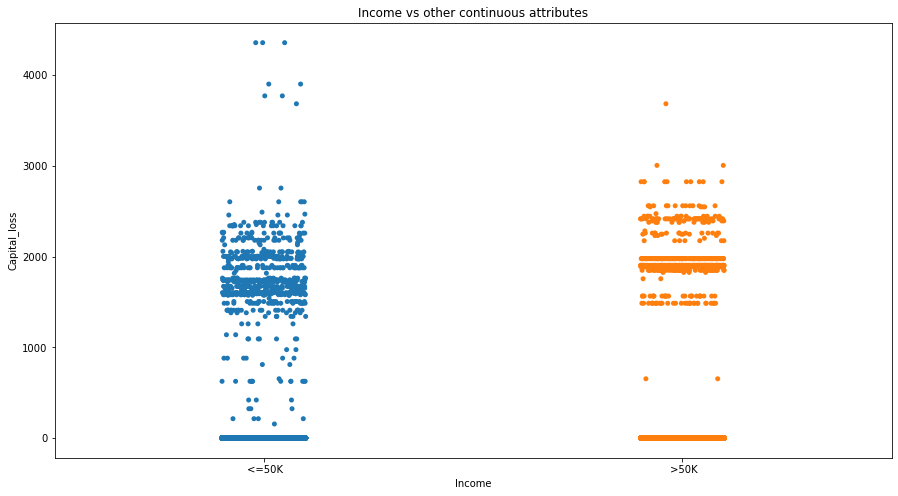

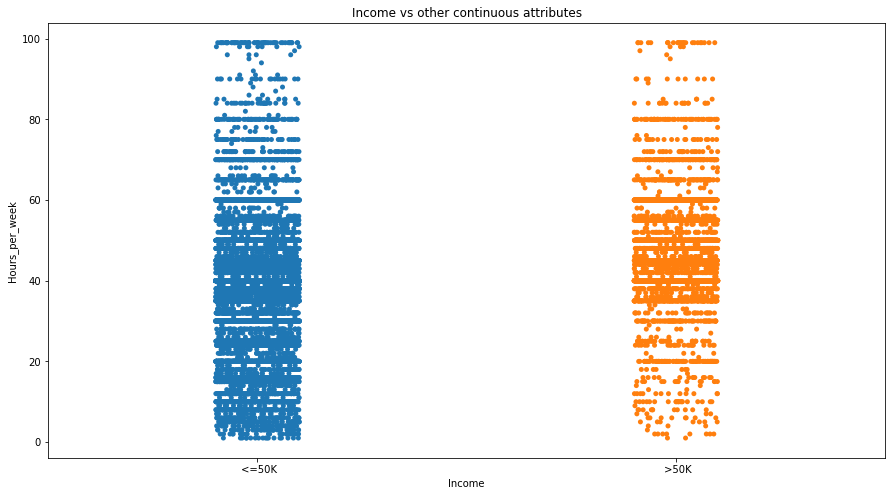

In [26]:
#bivariate analysis
for i in cont_cols:                                          
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['Income'], df[i])
    ax.set(xlabel = 'Income', ylabel = i)
    plt.title('Income vs other continuous attributes')
    plt.show()


Self Employed people are the only ones in workclass column who seems to have more 50K+ earners and less <=50k earners.

While in education column, Masters, Doctorate and Prof-School are the only ones which have more 50k+ earners and less <=50k earners.

People who are married irrespective of Relationship (Husband or Wife) seems to have higher chance of earning over 50k.

In [28]:
df['Income'].replace(' <=50K', 0, inplace = True)
df['Income'].replace(' >50K', 1, inplace = True)

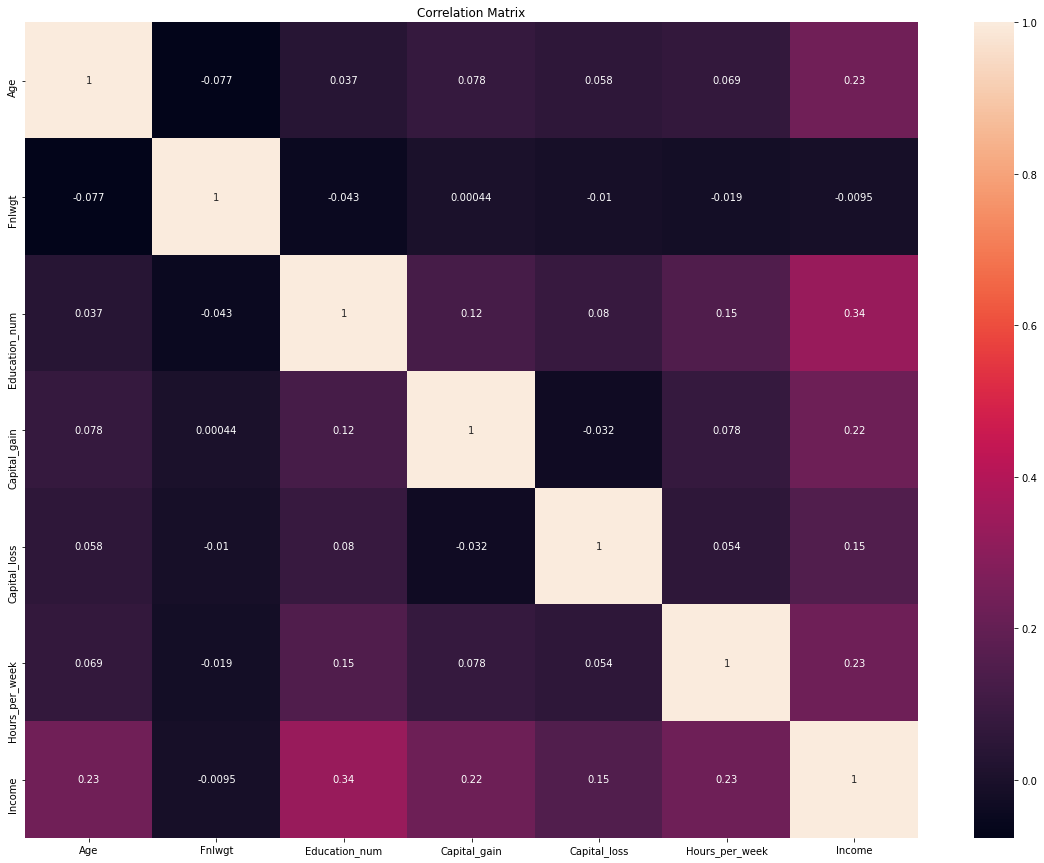

In [29]:
#multivariatte analysis
#correlation
plt.figure(figsize = [20, 15])                             
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()


Education seems to be most correlated with Income (0.34), apart from that Age, Hours_per_week and Capital_gain are also very much correlated with Income at 0.23, 0.23 and 0.22 respectively.

Final Weight seems to be least correlated with Income at -0.01.

# Outliers and Skewness

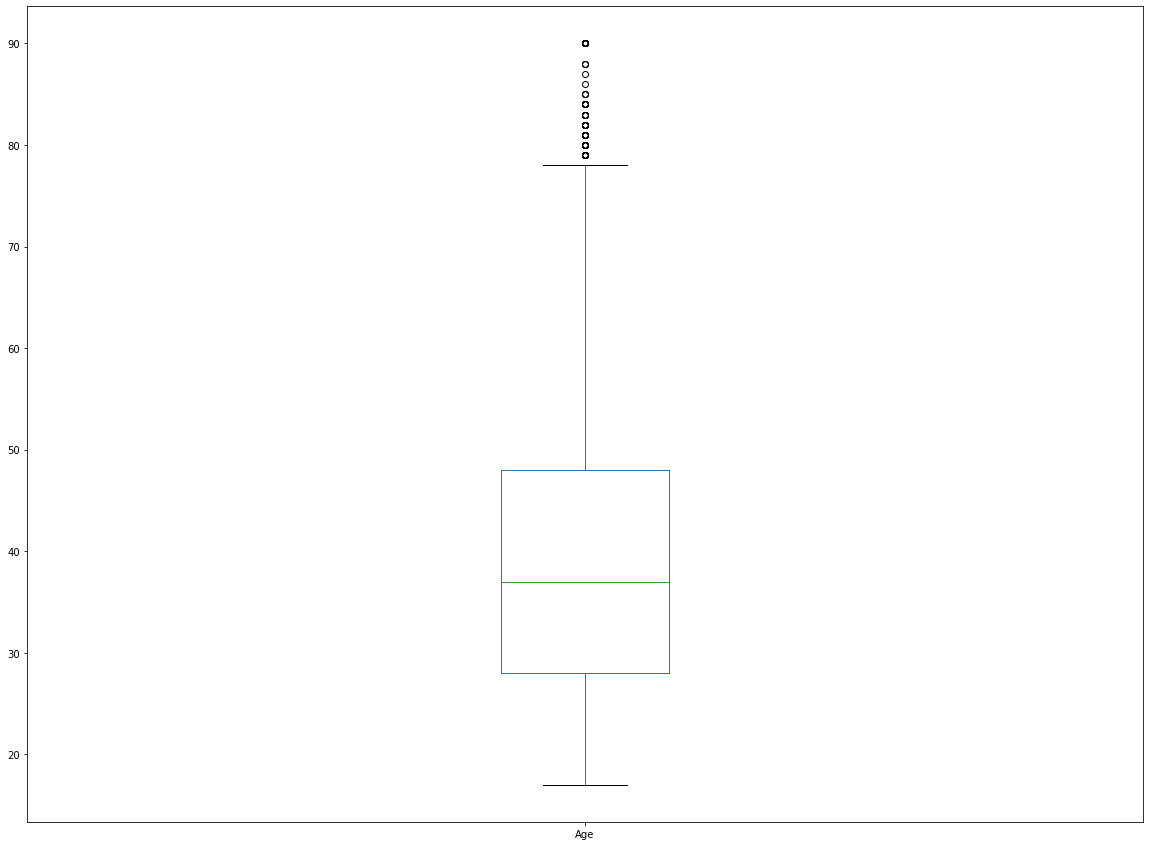

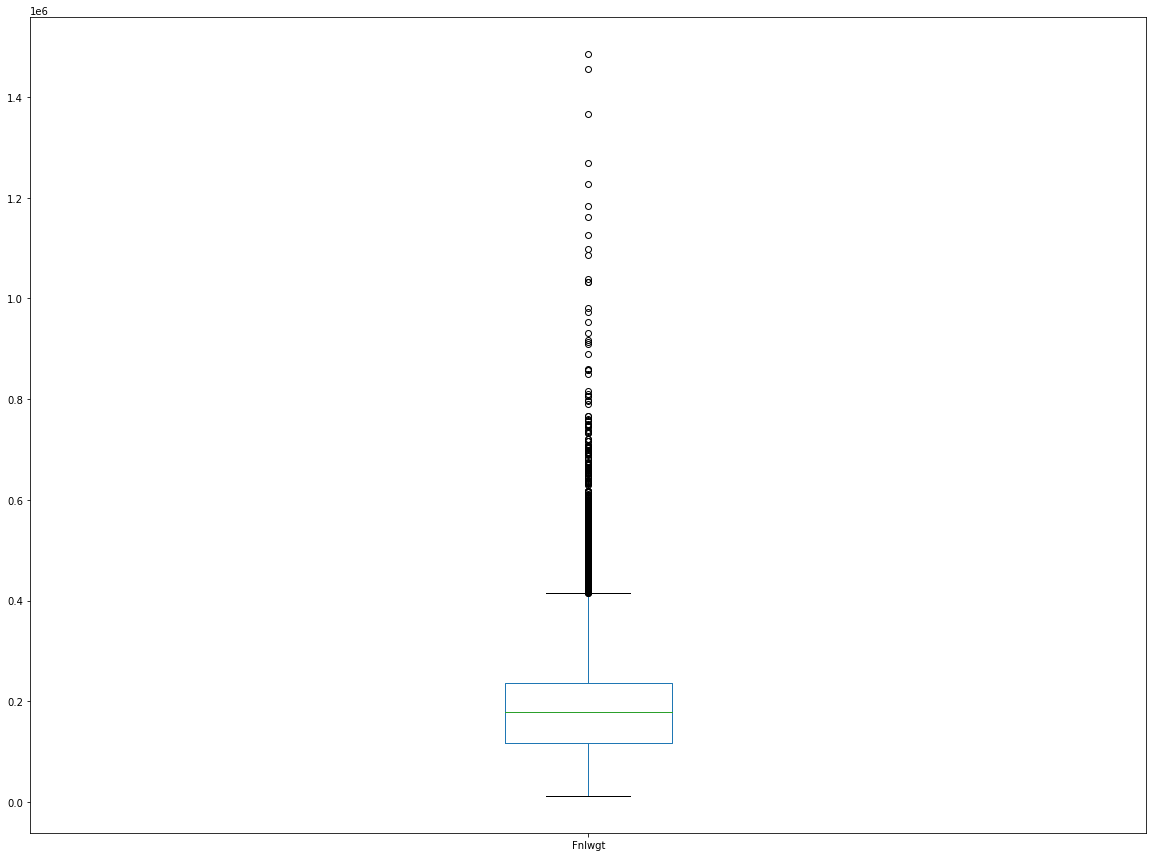

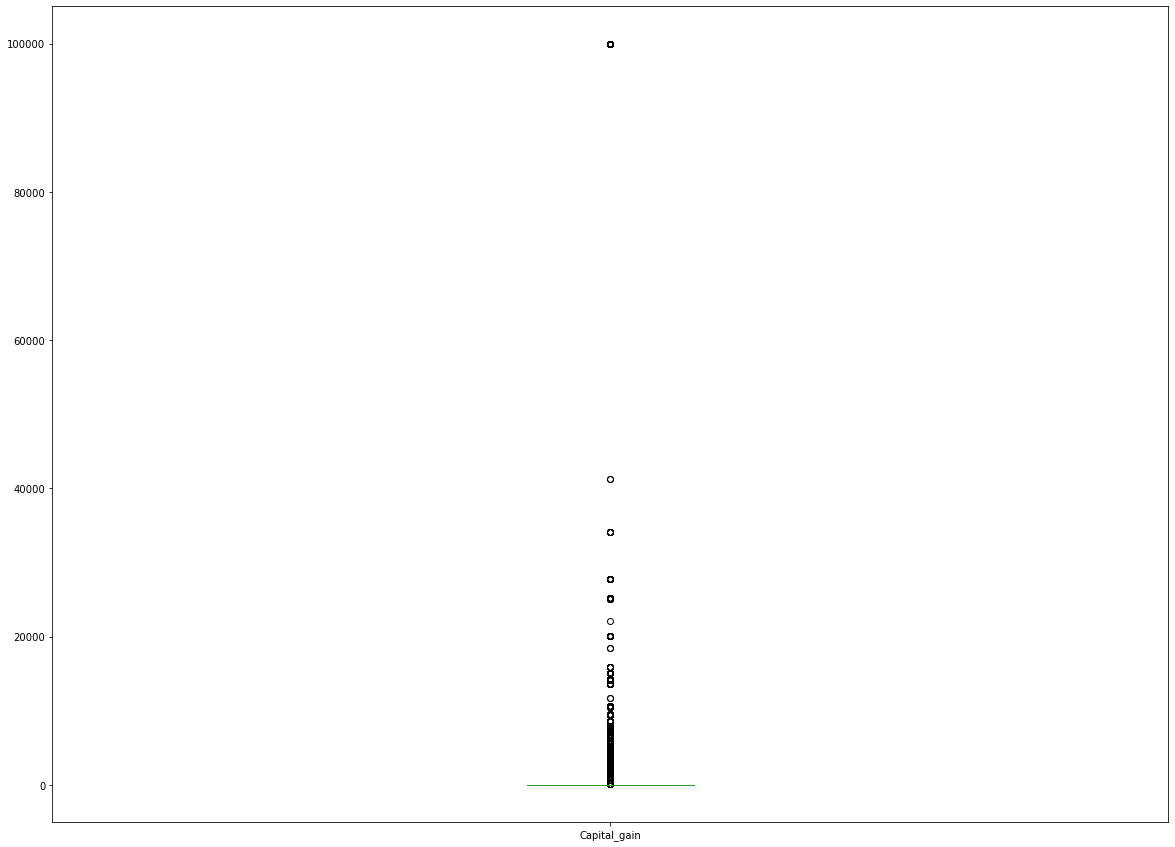

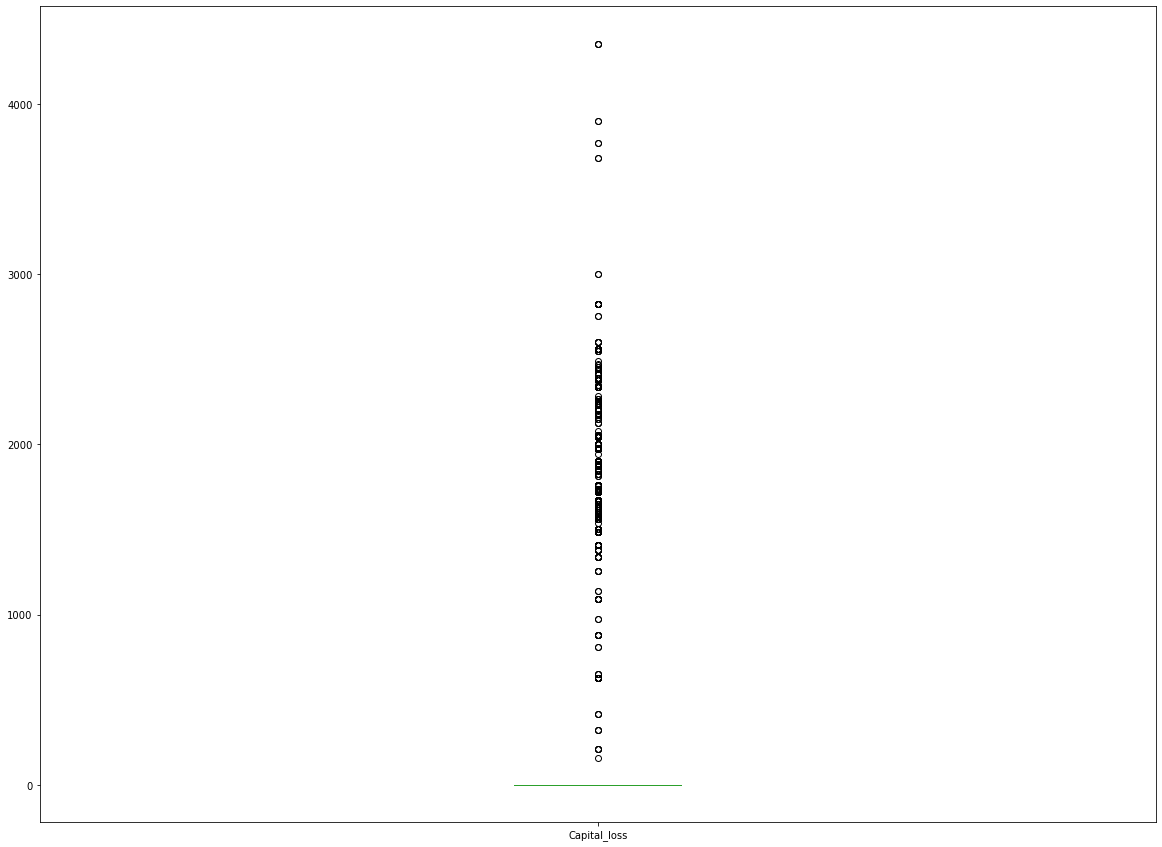

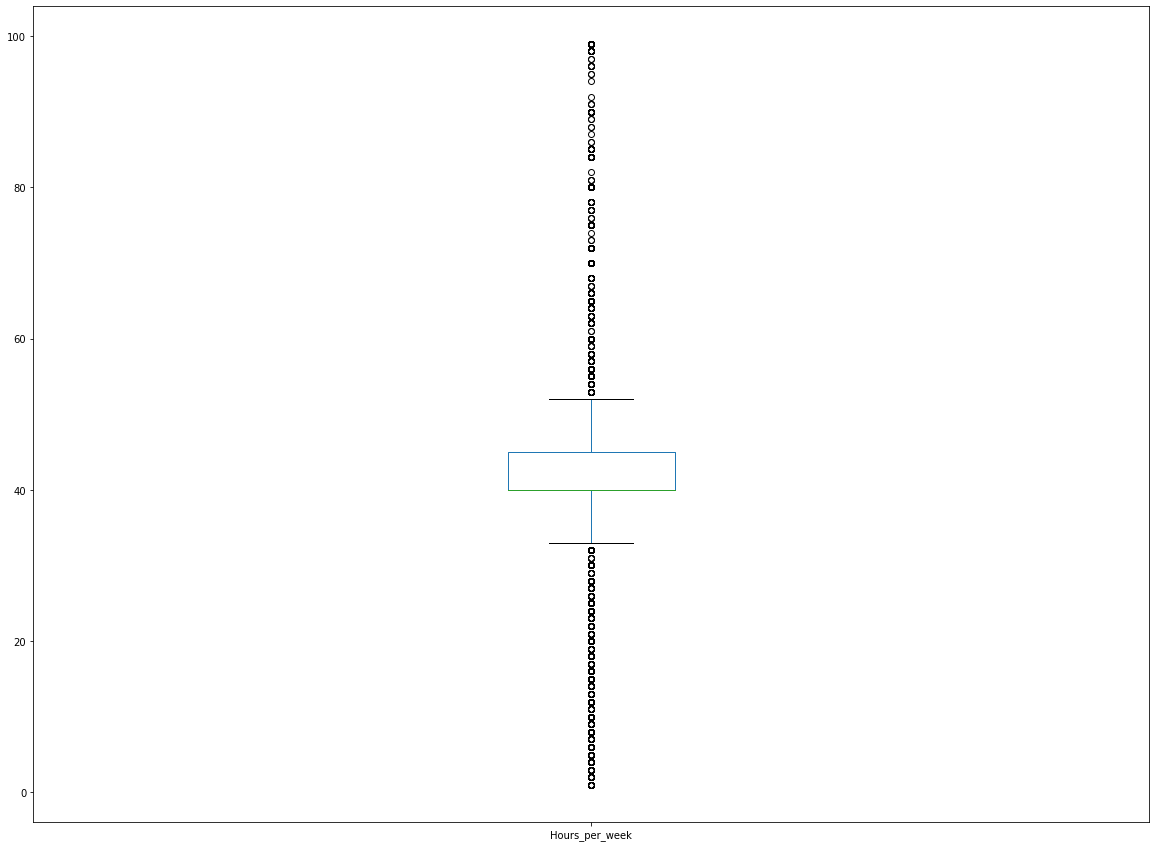

In [30]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [31]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Income             1.212383
dtype: float64

In [32]:
cont_cols.remove('Age')
cont_cols.remove('Hours_per_week')

In [33]:
df_new = df

In [34]:
#removing skewness
from sklearn.preprocessing import power_transform        
df_new[cont_cols] = power_transform(df[cont_cols], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df.columns)

In [35]:
df_new.skew()

Age               0.558738
Fnlwgt            0.016914
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Income            1.212383
dtype: float64

In [36]:
s = (df.dtypes == 'object')
obj_cols = list(s[s].index)

print("Categorical variables:")
print(obj_cols)

Categorical variables:
['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']


In [37]:
obj_cols.remove('Education')

In [39]:
#Encoding

label_encoder = LabelEncoder()
for col in obj_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

In [40]:
df_new = df_new.drop('Education', axis = 1)

In [41]:
x = df_new.drop('Income', axis = 1)
y = df_new['Income']

# Best random state

In [42]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.827088452088452 on Random State 448


# Spliting 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 448)

In [47]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.827088452088452
[[7008  506]
 [1183 1071]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7514
           1       0.68      0.48      0.56      2254

    accuracy                           0.83      9768
   macro avg       0.77      0.70      0.73      9768
weighted avg       0.81      0.83      0.82      9768

GaussianNB()
0.8156224406224406
[[6655  859]
 [ 942 1312]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7514
           1       0.60      0.58      0.59      2254

    accuracy                           0.82      9768
   macro avg       0.74      0.73      0.74      9768
weighted avg       0.81      0.82      0.81      9768

DecisionTreeClassifier()
0.8048730548730548
[[6483 1031]
 [ 875 1379]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7514
           1       0.57      0.61      0.

In [50]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.8140970515970516
 
Cross Validation Score for  GaussianNB()  model is : 0.8102272727272728
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.8023955773955775
 
Cross Validation Score for  SVC()  model is : 0.8196867321867322
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.8520577395577396
 


# Hypertuning

In [51]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [52]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [66]:
rfc1=RandomForestClassifier(random_state=448, max_features='sqrt', n_estimators= 200, max_depth=8, criterion='entropy')
Classifier=rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8604627354627354
[[7196  318]
 [1045 1209]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7514
           1       0.79      0.54      0.64      2254

    accuracy                           0.86      9768
   macro avg       0.83      0.75      0.78      9768
weighted avg       0.85      0.86      0.85      9768



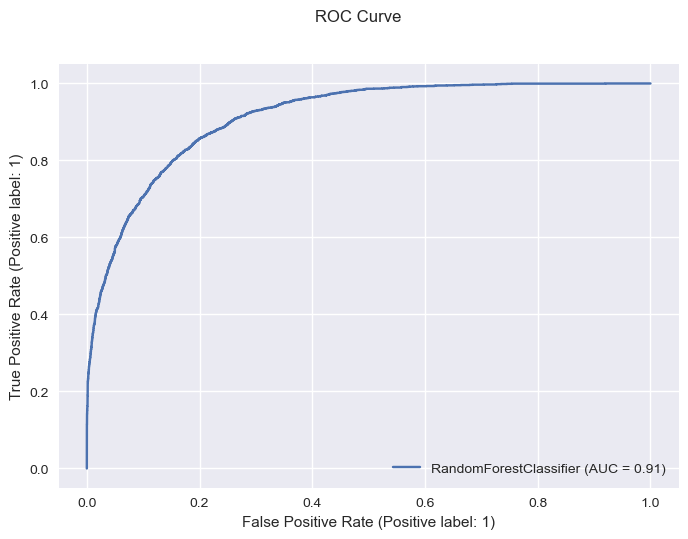

In [71]:
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(rfc1, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [54]:
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200, random_state=448)  model is : 0.8513513513513512


In [72]:
import pickle

filename = 'CensusIncome.pkl'
pickle.dump(rfc1, open(filename, 'wb'))

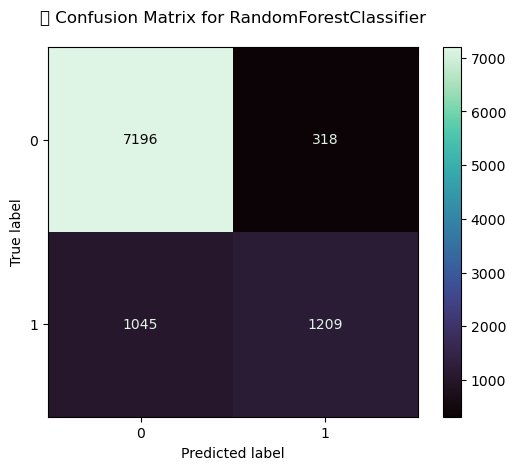

In [68]:
#Confusion matrix
from sklearn import metrics
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for RandomForestClassifier\n')
plt.show()